## Introduction to Pandas 

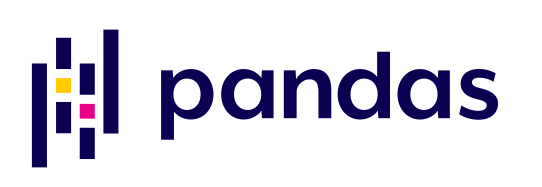

## What is pandas? 

- pandas is an open source, BSD-licensed library providing 
   - high-performance, easy-to-use data structures and 
   - data analysis tools for the Python programming language
- the documentation is availabe at [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)
- [**10 minute to pandas**](https://pandas.pydata.org/docs/user_guide/10min.html) introduction
- pandas [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) 

## Installation and Import

```
conda install pandas -c conda-forge
```

In [ ]:
import pandas as pd

## Pandas Data Structures

| Data Structure | Dimensionality | Spreadsheet Analog | Database Analog | Linear Algebra |
|----------------|----------------|--------------------|-----------------|----------------|
| Series         | 1D             | Column             | Column          | Column Vector  |
| DataFrame      | 2D             | Single Sheet       | Table           | Matrix         |

<font size="2">Source: M.Harrison - Effective Pandas</font>

## Pandas Series

 - a `Series` is used to model one-dimensional data (similar to an array, list, vector or a column in a table)
 - it contains an array of **data** (of any NumPy data type) and an associated array of data labels, its **index**
 - it behaves similarly to a NumPy array and shares common methods, like `mean`, `min`, `max` and many more

### Generating Pandas Series from Python lists

In [ ]:
nums = pd.Series([42, 314, 2, '17'])
nums

In [ ]:
nums.values

In [ ]:
nums.index

### Specifying an index

- instead of using the default index you can specify your own index and use it to access the data in the `Series`

In [ ]:
nums = pd.Series([42, 314, 2, 17], index=['p', 'y', 't', 'h'])

In [ ]:
# read and write values 
print(f"nums['t'] = {nums['t']}")
nums['t'] = 0
print(nums)

### NumPy array operations preserve index-value link

In [ ]:
nums[nums < 314]

In [ ]:
nums * 5

### In-place index change 

In [ ]:
nums.index = ['a', 'b', 'c', 'd']
nums

### `Series` from Python dictionaries

In [ ]:
residents = {'Munich': 1_563_723, 'Landshut': 73_065, 'Freising': 48_872}
residents = pd.Series(residents)
residents, type(residents)

### Naming the data array

- in addition to the index and the data array you can provide a name attribute to the `Series` object

In [ ]:
residents.name = "population"
residents

### Missing values 

In [ ]:
cities = ['Munich', 'Landshut', 'Freising', 'Ingolstadt']
residents = pd.Series(residents, index=cities)
residents

### Detect missing values

In [ ]:
pd.isnull(residents)

In [ ]:
pd.notnull(residents)

### Data alignment 

In [ ]:
resident_update = pd.Series({'Munich': 2_543, 'Regensburg': 152_270})
residents + resident_update

### Aggregation 

- you can use the `agg` method to compute multiple different aggregations 

In [ ]:
residents.agg(['mean', 'min', 'max', 'std', 'size'])

### Conversion and Memory Usage

- to compute the memory usage of a `Series` you can use the `.nbytes` property or the `.memory_usage` method
- `.astype` can be used to convert the data to a different data type

In [ ]:
residents = {'Munich': 1_563_723, 'Landshut': 73_065, 'Freising': 48_872}
residents = pd.Series(residents)
residents.nbytes # shows only how much memory the Pandas object is taking

In [ ]:
residents.memory_usage(deep=True) # includes the index memory and can include the contribution from object types

In [ ]:
residents.astype('int32').nbytes

In [ ]:
residents.astype('int32').memory_usage()

## Pandas DataFrame

- a Pandas `DataFrame` is the two-dimensional counterpart to the one-dimensional `Series`
- we think of a dataframe as <font color="red">column-oriented</font>, where each column is a `Series` (think of it as a dict of `Series`)
- it represents a tabular, <font color="red">spreadsheet-like data structure</font> containing an ordered collection of columns
- rows in a dataframe are accessed via the index and columns are accessible from the column name
- the columns can have different value types (numeric, string, boolean, etc.)

### Working with DataFrames

In [ ]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

### [Retrieving rows by index](https://pandas.pydata.org/docs/user_guide/indexing.html)

- you can use `.loc` or `.iloc` for location-based indexing
- `.loc` is primarily label based
- `.iloc` is primarily integer position based

In [ ]:
iris.iloc[3]

In [ ]:
iris.iloc[3, 0]

In [ ]:
iris.iloc[3, 0:2] # slicing works

### Retrieving columns by column name

In [ ]:
iris['sepal_width']

In [ ]:
sepal_width = iris.sepal_width.astype('float32')
sepal_width

In [ ]:
iris[['sepal_width', 'sepal_length']]

### Adding new columns

In [ ]:
iris['new_col'] = 3.14
iris

### Replacing columns

In [ ]:
import numpy as np
iris['new_col'] = np.arange(150.)
iris

### Deleting columns

In [ ]:
del iris['new_col']
iris

### Dropping entries from an axis

In [ ]:
iris = iris.drop('petal_width', axis=1) # drop column (axis=1) petal_width -- default is axis=0
iris

In [ ]:
iris = iris.drop(0) # drop first row
iris

### Filtering 

- filtering works the same way as for `Series`, but now you can apply it to multiple columns in parallel

In [ ]:
iris.iloc[1:10, 1:3] < 1.5

### Function application and mapping 

In [ ]:
def f(x):
    return pd.Series([x.mean(), x.std()], index=['mean', 'std'])

In [ ]:
iris.iloc[:, 0:3].apply(f) # applied to axis=0 by default; axis can be changed to axis=1 

### Element-wise application of functions

In [ ]:
def inc(x):
    return x + 1

In [ ]:
iris.iloc[:, 0:3].applymap(inc).head()

## Example - Movie Lens Dataset 
(from [Python for Data Analysis by Wes McKinney](https://github.com/wesm/pydata-book))

In [ ]:
encoding = 'latin1'

upath = './data/movielens/users.dat'
rpath = './data/movielens/ratings.dat'
mpath = './data/movielens/movies.dat'

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding, engine='python')
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding, engine='python')
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding, engine='python')

In [ ]:
users.head()

In [ ]:
ratings.head()

In [ ]:
movies.head()

### Merging dataframes

- to simplify our analysis of the data we can merge the 3 dataframes into one 
- if you don't specify the keys for the merge (join) Pandas infers which columns to use for the merge based on overlapping names

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

### Cross-tabulation with Pandas

- [Wikipedia](https://en.wikipedia.org/wiki/Pivot_table): A **pivot table** is a table of grouped values that aggregates the individual items of a more extensive table within one or more discrete categories
- we are interested in mean movie ratings for each film grouped by gender and will use the `pivot_table` function 

In [ ]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

### Counting the number of ratings

In [ ]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

### Filtering for movies with at least 250 ratings

In [ ]:
ratings_by_title[ratings_by_title >= 250]

In [ ]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

### Measuring rating disagreement

In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff.head(n=10)

In [ ]:
sorted_by_diff.tail(n=10)

### Movies that elicited the most disagreement among viewers

In [ ]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title[active_titles]  # choose only title with more than 250 ratings
rating_std_by_title.head()

In [ ]:
rating_std_by_title.sort_values(ascending=False)[:10]

## Literature

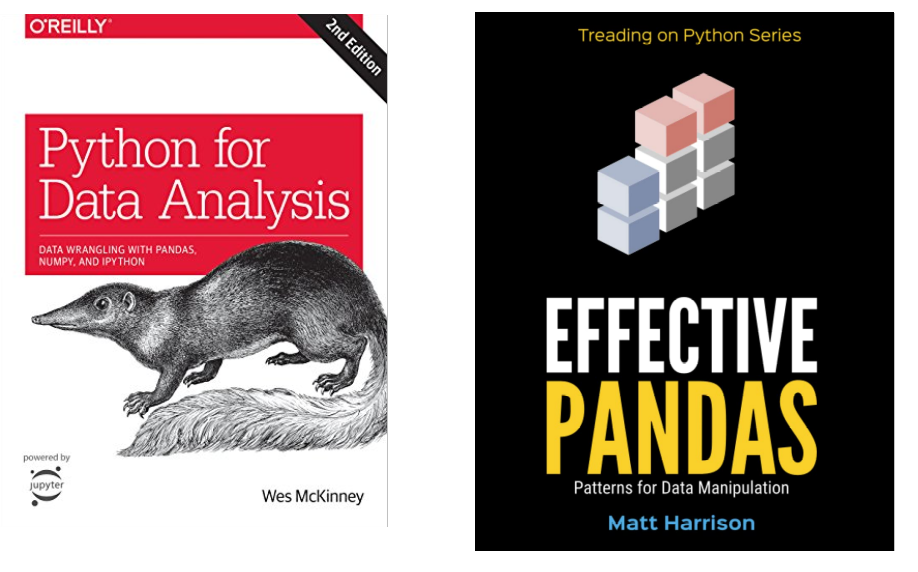

## Learning Resources

- the code for _Python for Data Analysis by Wes McKinney_ is available (MIT Licence) at [https://github.com/wesm/pydata-book](https://github.com/wesm/pydata-book)
- [Gred Reda's introduction](https://gregreda.com/2013/10/26/intro-to-pandas-data-structures/) to Pandas datastructures
- if you prefer watching videos instead of reading books or tutorials / blogs:
  - data school -- [data analysis in Python with Pandas video series](https://www.dataschool.io/easier-data-analysis-with-pandas/)
  - [Tom Augspurger PyData Seattle 2015 Pandas: .head() to .tail() tutorial](https://youtu.be/otCriSKVV_8)